In [1]:
import grid2op
import numpy as np
import torch
from grid2op.PlotGrid import PlotMatplot
from grid2op.Converter import IdToAct

In [ ]:
env = grid2op.make("l2rpn_neurips_2020_track2_small")
plot_helper = PlotMatplot(env.observation_space)
action_space = IdToAct(env.action_space)
archive = np.load("../data/l2rpn_neurips_2020_track2_small_action_space.npz")
action_space.init_converter(all_actions=archive[archive.files[0]])

In [23]:
worker_id = 1
mix_name = 'l2rpn_neurips_2020_track2_x3'
scenario_name = 'Scenario_november_45'

In [24]:
mix = env[mix_name]

In [25]:
env.seed(2020 + worker_id);

In [26]:
for i, path in enumerate(mix.chronics_handler.real_data.subpaths):
    if path.lower().endswith(scenario_name.lower()):
        break
chronic_id = i

In [27]:
mix.set_id(chronic_id)
mix.reset()
mix.chronics_handler.get_name()

'Scenario_november_45'

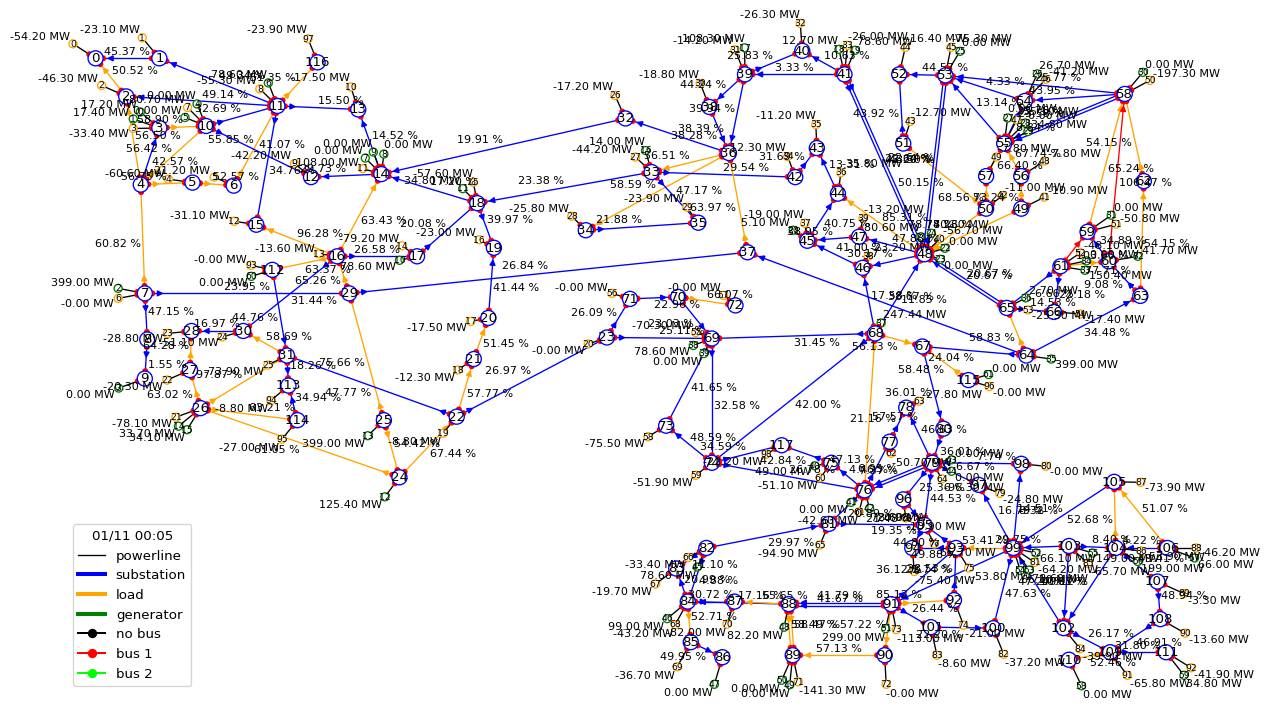

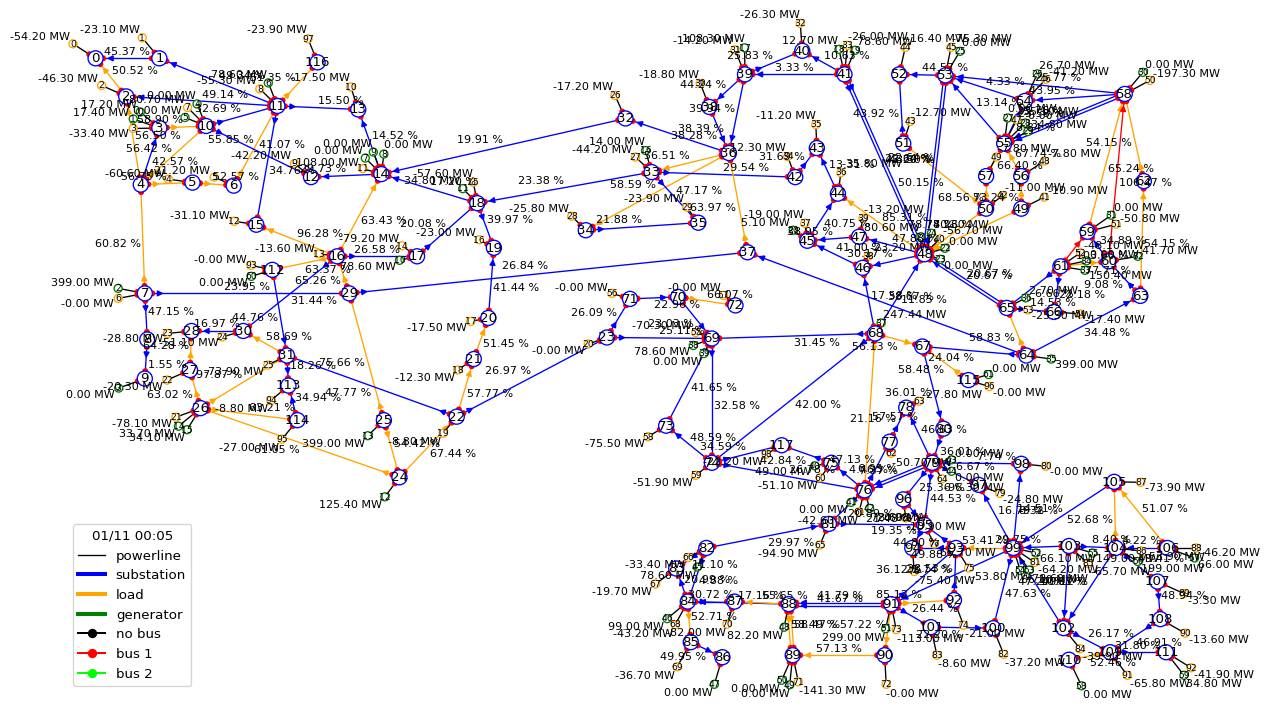

In [28]:
plot_helper.plot_obs(mix.current_obs)

In [30]:
np.sum(mix.current_obs.timestep_overflow)

2

In [31]:
done = False
i = 0
while not done:
    _, _, done, _ = mix.step(action_space())
    i += 1
i

10